<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float:  left; margin: 10px;">

# K Nearest Neighbors classification  
---
Week 4 | Lesson 4.1

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- **Explain** Classification and give a scenario where it might be applied
- **Graph** and explain KNN through visualization
- **Explain** intuition of KNN through an example
- **Apply**  to data and generate a visualization through code


## Opening: What is classification?

We've discussed the difference between continuous and discrete numbers. We've predicted continuous numbers using regression. What about discrete?

Let's revert back to our wine quality dataset from the past lecture. We used Linear Regression to predict the quality ranging from 0-10. What if we just wanted good or bad? How can we predict categories or classes? 

Classification algorithms do just that; they predict categories, or classes. Split the data into groups and place new data into those groups. 

Instead of line of Best Fit, we are looking for line of Best Split!
![Alt text](http://ipython-books.github.io/images/ml.png "Best Split vs Best Fit")

### KNN in Industry 

![](https://cdn-images-1.medium.com/max/800/1*5ztbgEt4NqpVaxTc64C-XA.png
)

Medium is a publication platform where anyone can start publishing articles. Medium attaches categorical tags to articles in order to notice readers what category each article falls under. Medium also uses these tags to recommend articles that it thinks readers may like. 

Medium built a very simple recommendation system using KNN. By the end of this course, you too will agree that ther recommendation system is very simple indeed - but effective! 

[Medium's Tag Recommendation System](https://medium.com/data-lab/how-we-used-data-to-suggest-tags-for-your-story-a120076d0bb6#.7vdljee27) Check it out!


Now let's step back and talk about how we as humans might classify things. We have some red and blue dots.
![Alt text](http://blog.yhat.com/static/img/knn_reds_and_blues.png "Some Dots")

A new dot appears. What color should it be?
![Alt text](http://blog.yhat.com/static/img/knn_new_point.png "A New Dot Appears")

Let's see that its closer to more red dots, so it's red!

![Alt text](http://blog.yhat.com/static/img/knn_new_point_pred.png "3 Nearest Neighbors")

What if we increase our "radius" of dots?
![Alt text](http://blog.yhat.com/static/img/knn_new_point_pred_blue.png "5 Nearest Neighbors")

We have just used the most simple, and intuitive, classification algorithm; K-Neared Neighbors (KNN). The k stands for how many "neighbors" you use.

---

## kNN

The pseudocode algorithm for kNN is as follows:

```
for unclassified_point in sample:
    for known_point in known_class_points:
        calculate distances (euclidean or other) between known_point and unclassified_point
    for k in range of specified_neighbors_number:
        find k_nearest_points in known_class_points to unclassified_point
    assign class to unclassified_point using "votes" from k_nearest_points
```
----
**Check for Understanding: ** Explain how the KNN algorithm works. 


---
## What does Distance mean?
While we can visually look at how close things are, how can we define that mathematically?

### Euclidean Distance

Remember the famous Pythagorean Theorem
![Alt text](http://ncalculators.com/images/pythagoras-theorem.gif)

We can apply the theorem to calculate distance between points. This is called Euclidean distance. 

![Alt text](http://rosalind.info/media/Euclidean_distance.png)


$$Euclidean  Distance=\sqrt{(x_1-x_2)^2+(y_1-y_1)^2}$$

There are many different distance metrics, but KNN usually uses Euclidean.

### Manhattan Distance (A.K.A Taxicab Distance)

Another way to measure distance is between two points is to take the absolute value of their differnce. 
![](http://angiogenesis.dkfz.de/oncoexpress/software/cs_clust/dist_004.gif)


The name Manhattan Distance comes from the fact that taxicabs in Manhattan must drive from point A to point B on streets that force traffic to flow forward or backwards and left or right -- but never diagonally. 
![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Manhattan_distance_bgiu.png/261px-Manhattan_distance_bgiu.png)
![](https://pbs.twimg.com/media/CgIlqLTWEAAedKB.jpg)

### The main idea:

1. Manhattan Distance is more restrictive than Euclidean Distance in how distance is measured
2. Manhattan Distance comes from $L_{p = 1}$ space and Euclidean Distance comes from $L_{p = 2}$ space (Lp spaces are mentioned in the Regularization Lesson)
3. In practice, we will cross validate KNN using both types of distances to see which performs best. 

**Optional:** Check out this link on Lp space if you feel so inclined [Lp Space](https://en.wikipedia.org/wiki/Lp_space)

![](http://www.improvedoutcomes.com/docs/WebSiteDocs/image/diagram_euclidean_manhattan_distance_metrics.gif)

## More Dimensions

Classification, KNN, and distance all expand to more than two variables, but we are only able to visualize up to three at once!
![Alt text](http://farm5.static.flickr.com/4006/4608694916_1c6f17b2c6_o.png)

## Getting Started

In this notebook we are going to look at how the kNN algorithm classifies malignant vs. benign tumor category in the Wisconsin breast cancer dataset.

[NOTE: in the case of ties, sklearn's `KNeighborsClassifier()` will just choose the first class using uniform weights! If this is unappealing to you you can change the weights keyword argument to 'distance'.]

---

### 1. Import necessary packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.neighbors import KNeighborsClassifier

In [2]:
import imp
plotter = imp.load_source('plotter', '../../../utils/plotting/knn_plotter.py')
from plotter import KNNBoundaryPlotter

---

### 2. Load in the dataset

My path, for example, below: is provided.

(The file as suffix '.data' but is actually formatted as a .csv)

In [3]:
bcw = pd.read_csv('../../../datasets/breast_cancer_wisconsin/wdbc.data', 
                  header=None, index_col=None)

---

### 2.2 Renaming the columns

The attributes below will be the columns of the dataset.

      Attribute                     
   --------------------------------------------
   1. Sample code number [subject ID]
   2. Class
   3. Cell nucleus mean radius
   4. Cell nucleus SE radius
   5. Cell nucleus worst radius
   6. Texture mean
   7. Texture SE
   8. Texture worst
   9. Perimeter mean
   10. Perimeter SE
   11. Perimeter worst
   12. Area mean
   13. Area SE
   14. Area worst
   15. Smoothness mean
   16. Smoothness SE
   17. Smoothness worst
   18. Compactness mean
   19. Compactness SE
   20. Compactness worst
   21. Concavity mean
   22. Concavity SE
   23. Concavity worst
   24. Concave points mean
   25. Concave points SE
   26. Concave points worst
   27. Symmetry mean
   28. Symmetry SE
   29. Symmetry worst
   30. Fractal dimension mean
   31. Fractal dimension SE
   32. Fractal dimension worst

The column names are taken from the dataset info file. 

For more information check out the information file:

`../assets/datasets/wdbc.names`

You can open it with a text editor of your choice.

Create an array with the column names and assign them as the header when loading the csv.

In [4]:
bcw.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [5]:
column_names = ['id','malignant',
                'nucleus_mean','nucleus_se','nucleus_worst',
                'texture_mean','texture_se','texture_worst',
                'perimeter_mean','perimeter_se','perimeter_worst',
                'area_mean','area_se','area_worst',
                'smoothness_mean','smoothness_se','smoothness_worst',
                'compactness_mean','compactness_se','compactness_worst',
                'concavity_mean','concavity_se','concavity_worst',
                'concave_pts_mean','concave_pts_se','concave_pts_worst',
                'symmetry_mean','symmetry_se','symmetry_worst',
                'fractal_dim_mean','fractal_dim_se','fractal_dim_worst']

bcw.columns = column_names

---

### 2.3 Check out the dataset information

Print out the head and the datatypes.

In [6]:
# head
bcw.head()

,id,malignant,nucleus_mean,nucleus_se,nucleus_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,...,concavity_worst,concave_pts_mean,concave_pts_se,concave_pts_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dim_mean,fractal_dim_se,fractal_dim_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# dtypes
bcw.dtypes

id                     int64
malignant             object
nucleus_mean         float64
nucleus_se           float64
nucleus_worst        float64
texture_mean         float64
texture_se           float64
texture_worst        float64
perimeter_mean       float64
perimeter_se         float64
perimeter_worst      float64
area_mean            float64
area_se              float64
area_worst           float64
smoothness_mean      float64
smoothness_se        float64
smoothness_worst     float64
compactness_mean     float64
compactness_se       float64
compactness_worst    float64
concavity_mean       float64
concavity_se         float64
concavity_worst      float64
concave_pts_mean     float64
concave_pts_se       float64
concave_pts_worst    float64
symmetry_mean        float64
symmetry_se          float64
symmetry_worst       float64
fractal_dim_mean     float64
fractal_dim_se       float64
fractal_dim_worst    float64
dtype: object

---

### 2.4 Recode the class variable to be 0 vs. 1

The "malignant" class target variable is coded as "B" for benign and "M" as malignant. 

We need to recode this to a binary integer for classification, with "1" as malign and "0" as benign (malign is assigned to 1 because our goal is to predict malign tumors with the data).

In [8]:
# change class variables
bcw.malignant = bcw.malignant.map( lambda x: 0  if x == 'B' else 1)

In [10]:
bcw.malignant.tail()

564    1
565    1
566    1
567    1
568    0
Name: malignant, dtype: int64

---

### 3. Break up the data and look at correlations

Split up the data into 3 datasets for the "mean", "standard error", and "worst" statistics on each predictor variable.

NOTE: The difference between standard error and standard deviation is subtle:

**Standard deviation:**
An estimate of distance between sample observations and the sample mean.

** Standard error:**
An estimate of distance between the sample mean and the real population mean.


In [14]:
# A function that subsets the data to the columns indicating the
# mean, se, or wrong variable types
def df_subsetter(df, suffix):
    '''Funtion creates a sub-dataframe
    
    Input: df, pandas dataframe
           suffix, suffix common to several column names, list or array
           
    Output: sub-datafarme'''
    # create list comprehension that selects column names with the passed in suffix
    column_select = [col for col in df.columns if suffix in col]
    # save bcw[['id','malignant'] + column_select] to a variable
    sub_df = bcw[['id','malignant'] + column_select]
    # replace the suffix with an emtpy string
    sub_df.columns = sub_df.columns.map(lambda col: col.replace(suffix, ""))
    # return sub-dataframe
    return sub_df

In [15]:
# your function should be able to run this code
bcw_mean = df_subsetter(bcw, '_mean')
bcw_se = df_subsetter(bcw, '_se')
bcw_worst = df_subsetter(bcw, '_worst')

In [16]:
bcw_mean.head()

,id,malignant,nucleus,texture,perimeter,area,smoothness,compactness,concavity,concave_pts,symmetry,fractal_dim
0,842302,1,17.99,1001.0,0.3001,0.07871,8.589,0.04904,0.03003,17.33,0.1622,0.2654
1,842517,1,20.57,1326.0,0.0869,0.05667,3.398,0.01308,0.01389,23.41,0.1238,0.1860
2,84300903,1,19.69,1203.0,0.1974,0.05999,4.585,0.04006,0.02250,25.53,0.1444,0.2430
3,84348301,1,11.42,386.1,0.2414,0.09744,3.445,0.07458,0.05963,26.50,0.2098,0.2575
4,84358402,1,20.29,1297.0,0.1980,0.05883,5.438,0.02461,0.01756,16.67,0.1374,0.1625


In [17]:
bcw_se.head()

,id,malignant,nucleus,texture,perimeter,area,smoothness,compactness,concavity,concave_pts,symmetry,fractal_dim
0,842302,1,10.38,0.11840,0.14710,1.0950,153.40,0.05373,0.006193,184.60,0.6656,0.4601
1,842517,1,17.77,0.08474,0.07017,0.5435,74.08,0.01860,0.003532,158.80,0.1866,0.2750
2,84300903,1,21.25,0.10960,0.12790,0.7456,94.03,0.03832,0.004571,152.50,0.4245,0.3613
3,84348301,1,20.38,0.14250,0.10520,0.4956,27.23,0.05661,0.009208,98.87,0.8663,0.6638
4,84358402,1,14.34,0.10030,0.10430,0.7572,94.44,0.05688,0.005115,152.20,0.2050,0.2364


In [18]:
bcw_worst.head()

,id,malignant,nucleus,texture,perimeter,area,smoothness,compactness,concavity,concave_pts,symmetry,fractal_dim
0,842302,1,122.80,0.27760,0.2419,0.9053,0.006399,0.01587,25.38,2019.0,0.7119,0.11890
1,842517,1,132.90,0.07864,0.1812,0.7339,0.005225,0.01340,24.99,1956.0,0.2416,0.08902
2,84300903,1,130.00,0.15990,0.2069,0.7869,0.006150,0.02058,23.57,1709.0,0.4504,0.08758
3,84348301,1,77.58,0.28390,0.2597,1.1560,0.009110,0.01867,14.91,567.7,0.6869,0.17300
4,84358402,1,135.10,0.13280,0.1809,0.7813,0.011490,0.01885,22.54,1575.0,0.4000,0.07678


---

### 3.1 Examine correlation matrices for the 3 datasets

Look at the correlations between variables for each of the subset datasets, excluding the id column.

Use a seaborn heatmap to make this easier on the eye.

1. The mean columns subset
2. The standard error columns subset
3. The "worst value" columns subset

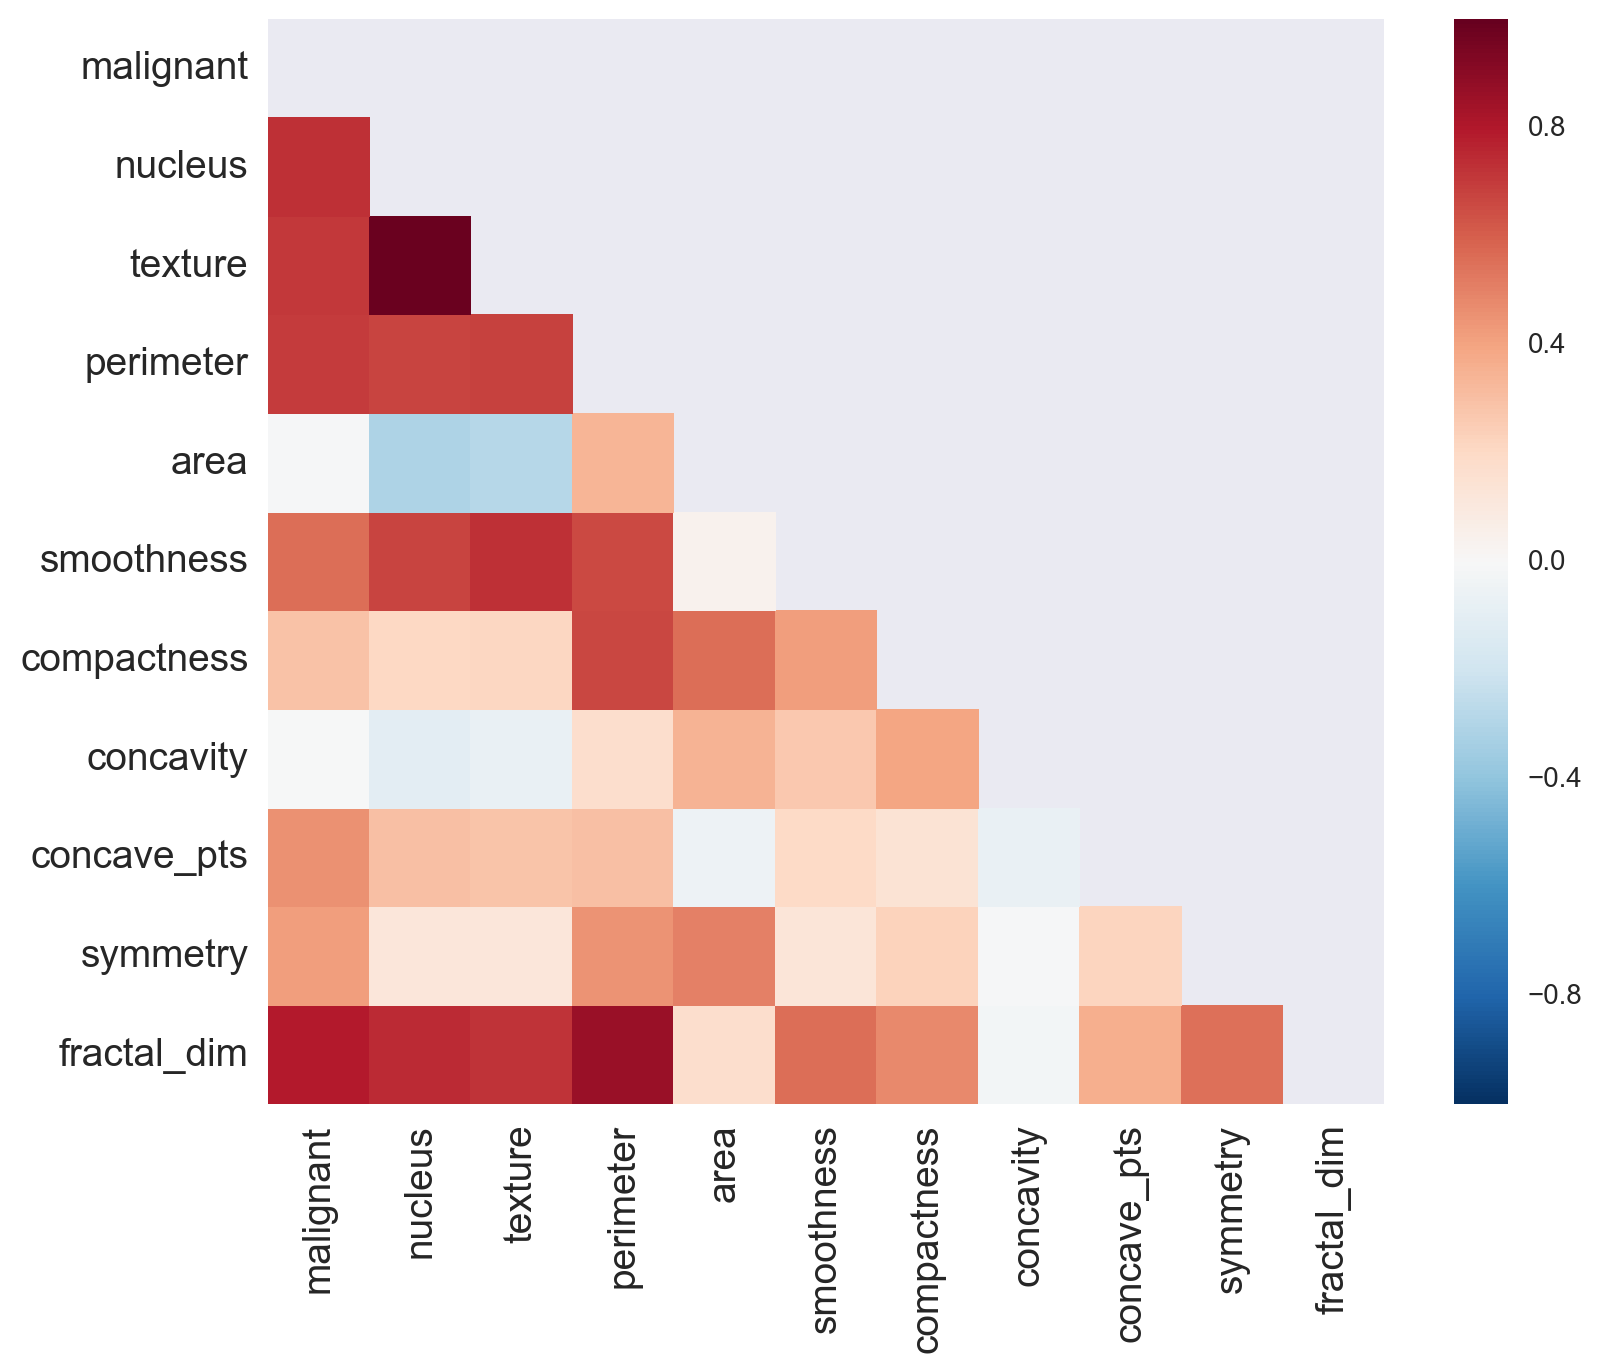

In [19]:
mean_corr = bcw_mean[[x for x in bcw_mean.columns if x not in 'id']].corr()

# Set the default matplotlib figure size:
plt.rcParams['figure.figsize']=(9,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

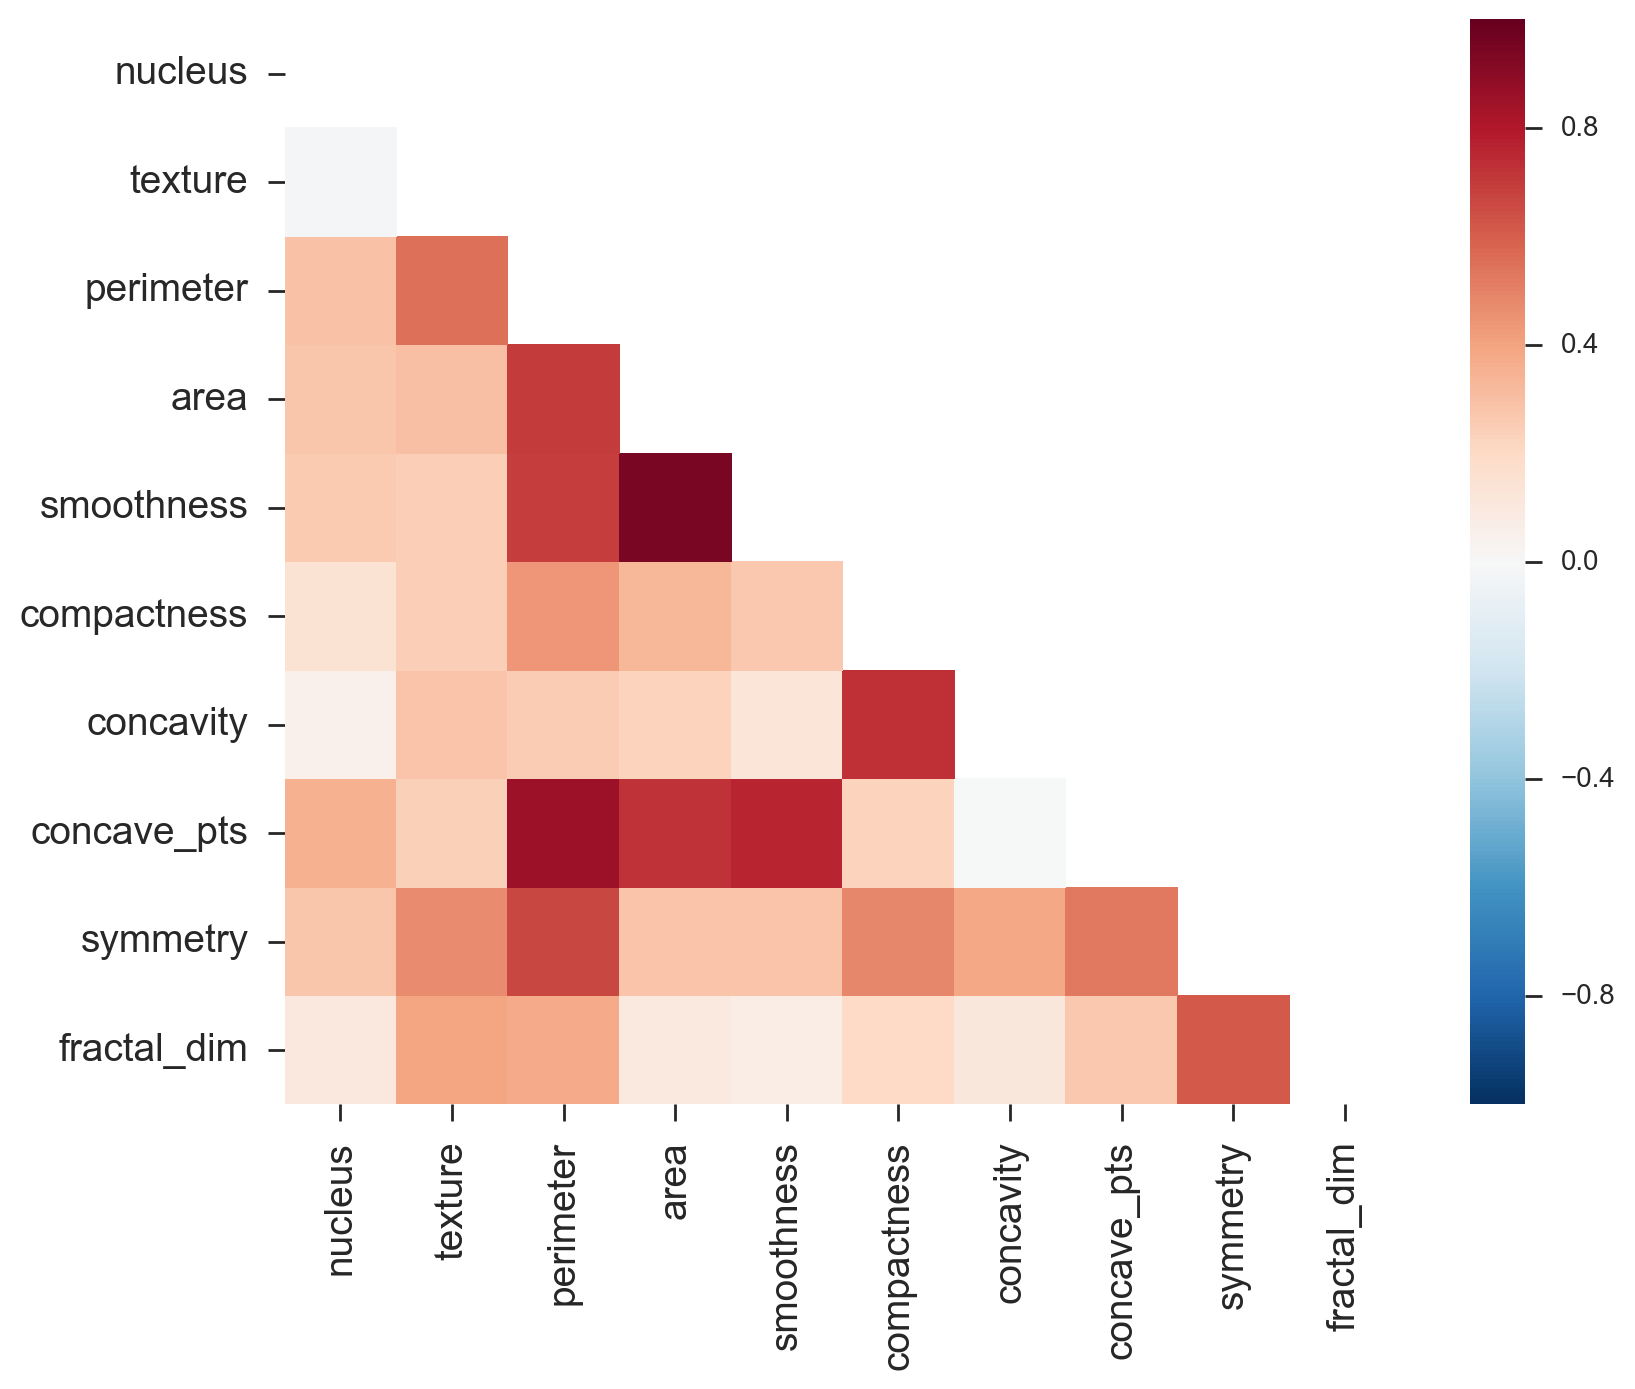

In [101]:
se_corr = bcw_se[[x for x in bcw_se.columns if x not in 'id']].corr()

# Set the default matplotlib figure size:
plt.rcParams['figure.figsize']=(9,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(se_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(se_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

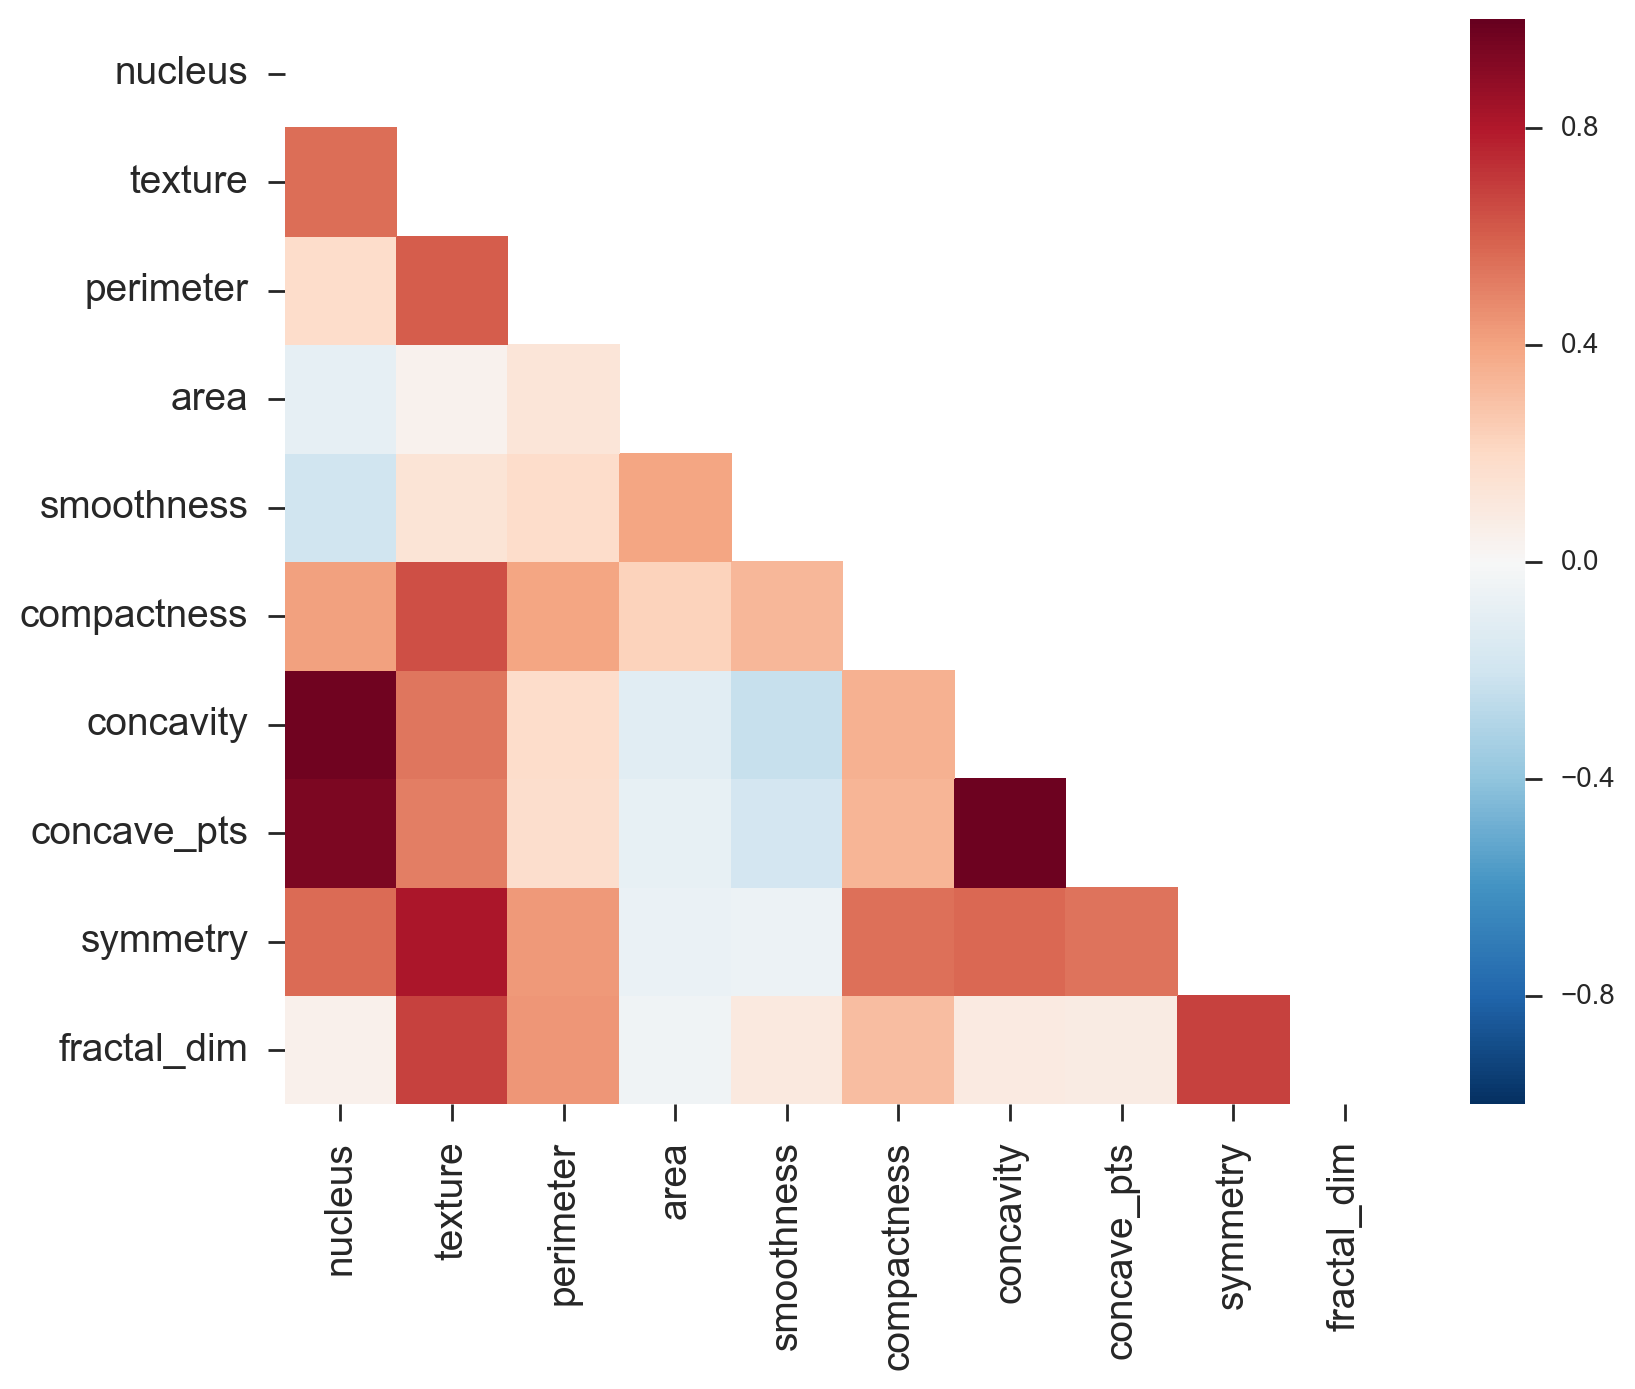

In [102]:
worst_corr = bcw_worst[[x for x in bcw_worst.columns if x not in 'id']].corr()

# Set the default matplotlib figure size:
plt.rcParams['figure.figsize']=(9,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(worst_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(worst_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

---

### 4. Use seaborn's pairplot to visualize relationships between variables

Look at the data using seaborn's `pairplot()` function. The hue will be the class variable "malignant". The variables will be the other columns excluding, of course, the subject ID column.

Most of these predictors are highly correlated with the "class" variable. This is already an indication that our classifier is very likely to perform well.

In [33]:
# set the seaborn style to have a white background
sns.set(style="ticks", color_codes=True)

# This function does a pairplot across your variables with the color
# set as the outcome "malignant" class variable
def bcw_pairplotter(df, variables, sample_frac=0.3):
    # sample_frac lets you specify an amount of the data to sample for the plot.
    # this speeds up the function which can take awhile with the full data.
    
    # get the number of rows/data points:
    rows = df.shape[0]
    
    # get downsample indicies for the data, if specified
    if sample_frac < 1.0:
        sample_inds = np.random.choice(range(0,rows), 
                                       size=int(round(rows*sample_frac)), 
                                       replace=False).astype(int)
    
    # make the pairplot for the variables:
    pairs = sns.pairplot(df.iloc[sample_inds, :], 
                         vars=variables, 
                         hue="malignant", 
                         palette=sns.xkcd_palette(['windows blue', 'amber']))


# get out the column variable names to put into the pairplotter function
colvars = [x for x in bcw_mean if x not in ['id','malignant']]

In [34]:
print colvars

colvars[0:3]

['nucleus', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_pts', 'symmetry', 'fractal_dim']


['nucleus', 'texture', 'perimeter']

In [36]:
colvars[0:3]

['nucleus', 'texture', 'perimeter']

---

### 4.2 Plot the mean data subset with the pairplotter function

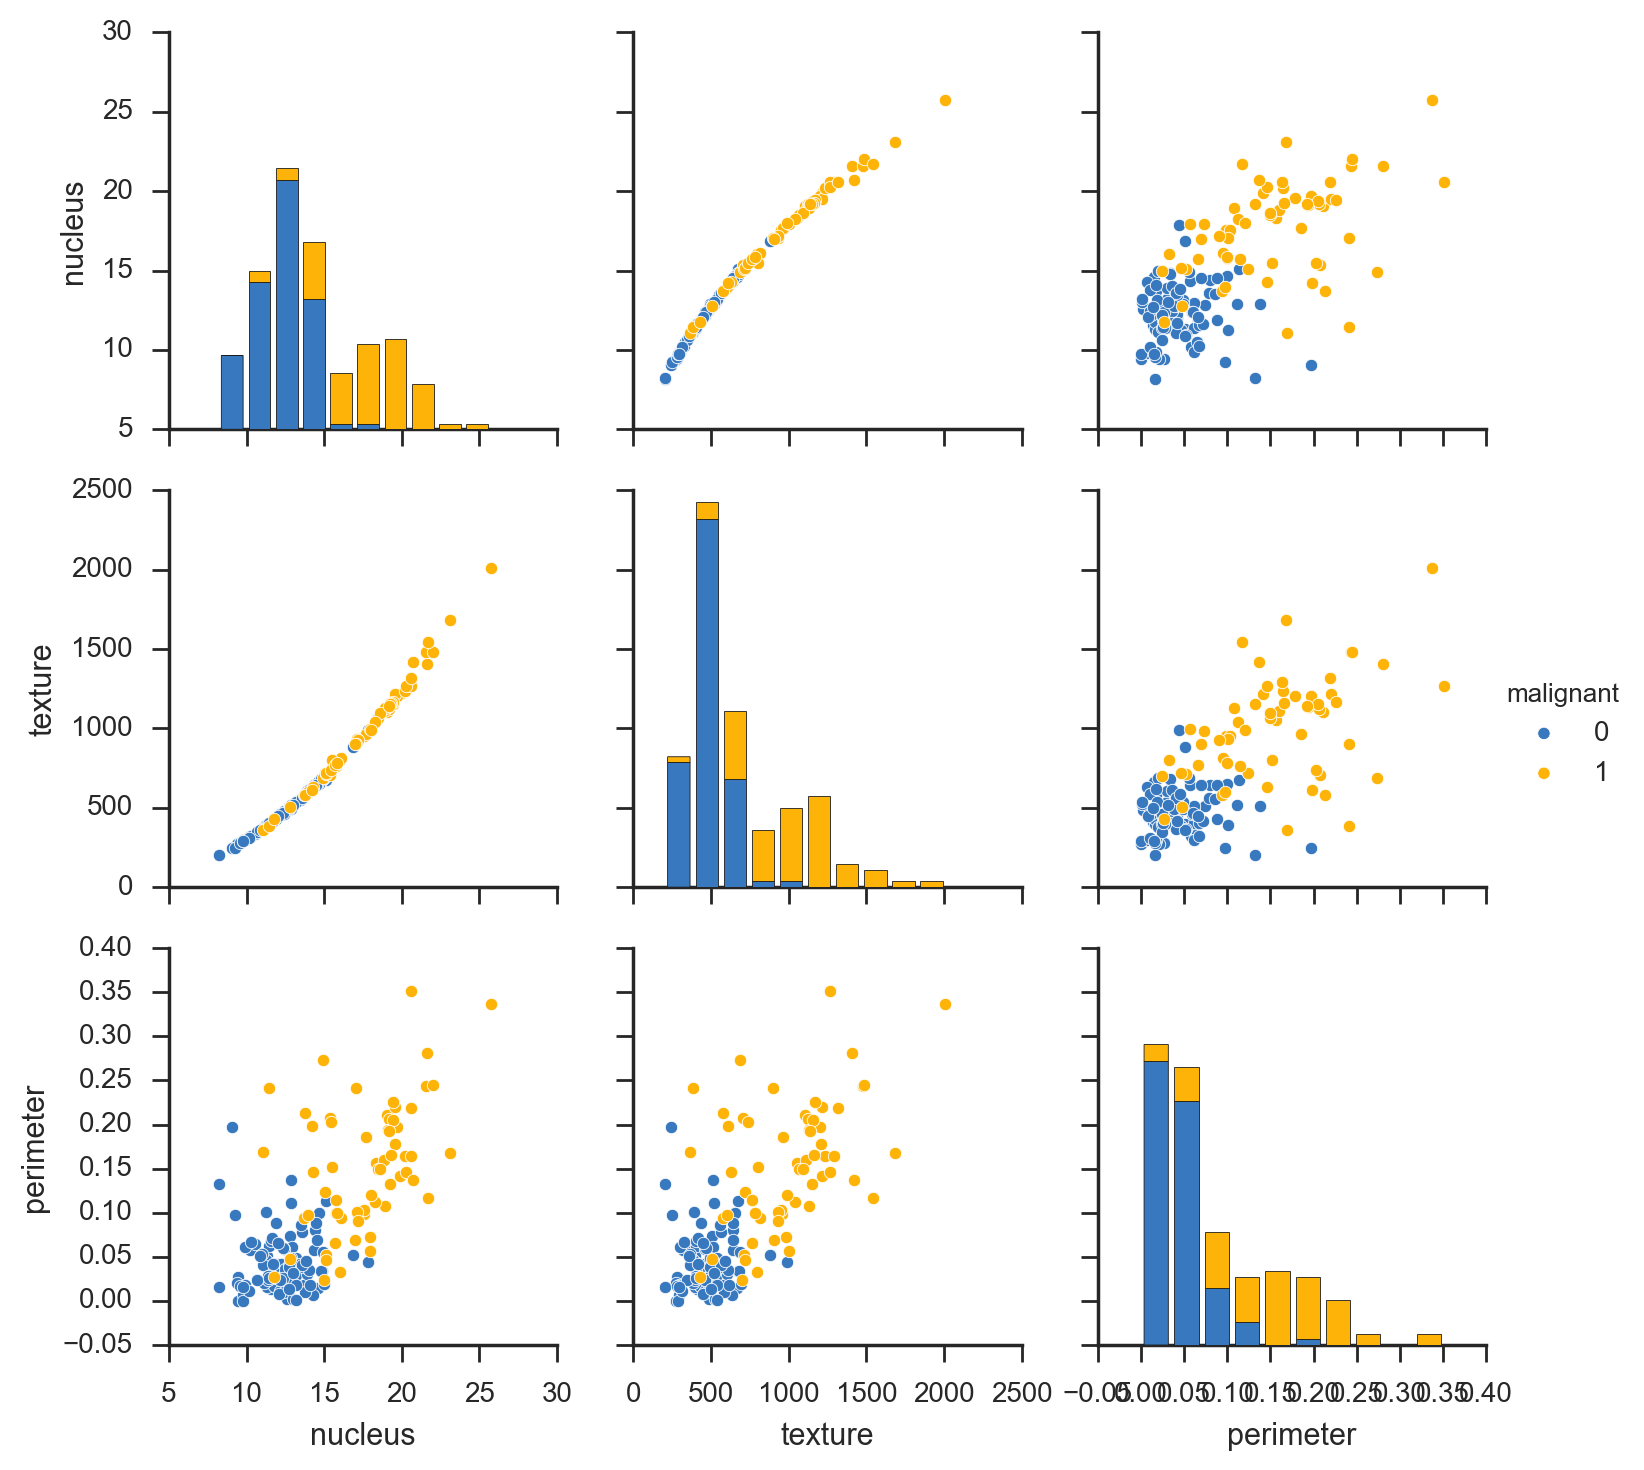

In [37]:
bcw_pairplotter(bcw_mean, colvars[0:3])

**Check for Understanding: ** Based ont he scatter  plots, should be expect KNN to perform well or poorly with this dataset?

---

### 4.3 Plot the standard error data subset with the pairplotter function

In [26]:
print colvars

colvars[0:3]

['nucleus', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_pts', 'symmetry', 'fractal_dim']


['nucleus', 'texture', 'perimeter']

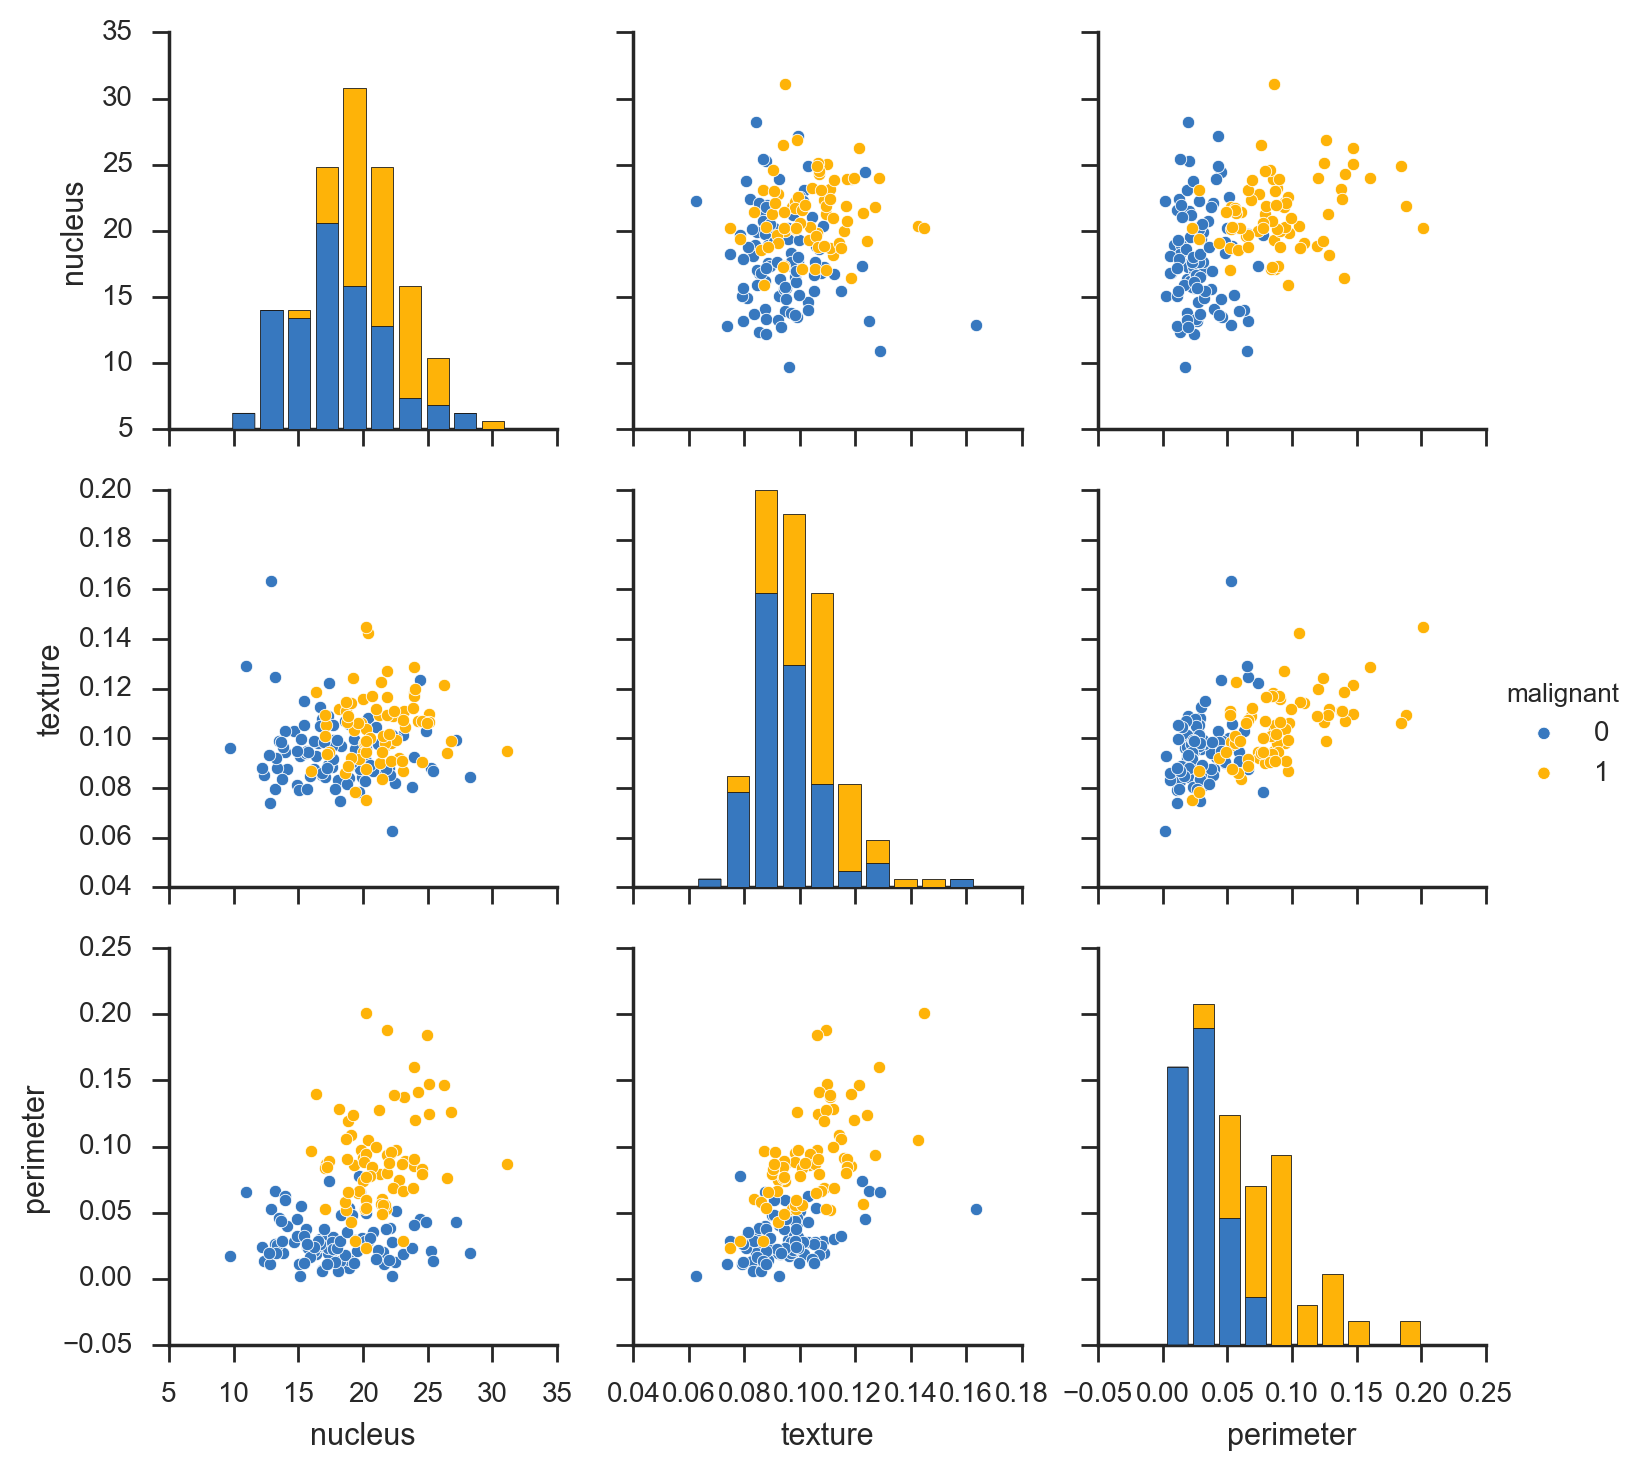

In [27]:
bcw_pairplotter(bcw_se, colvars[0:3])

---

### 4.4 Plot the worst value data subset using the pairplotter function

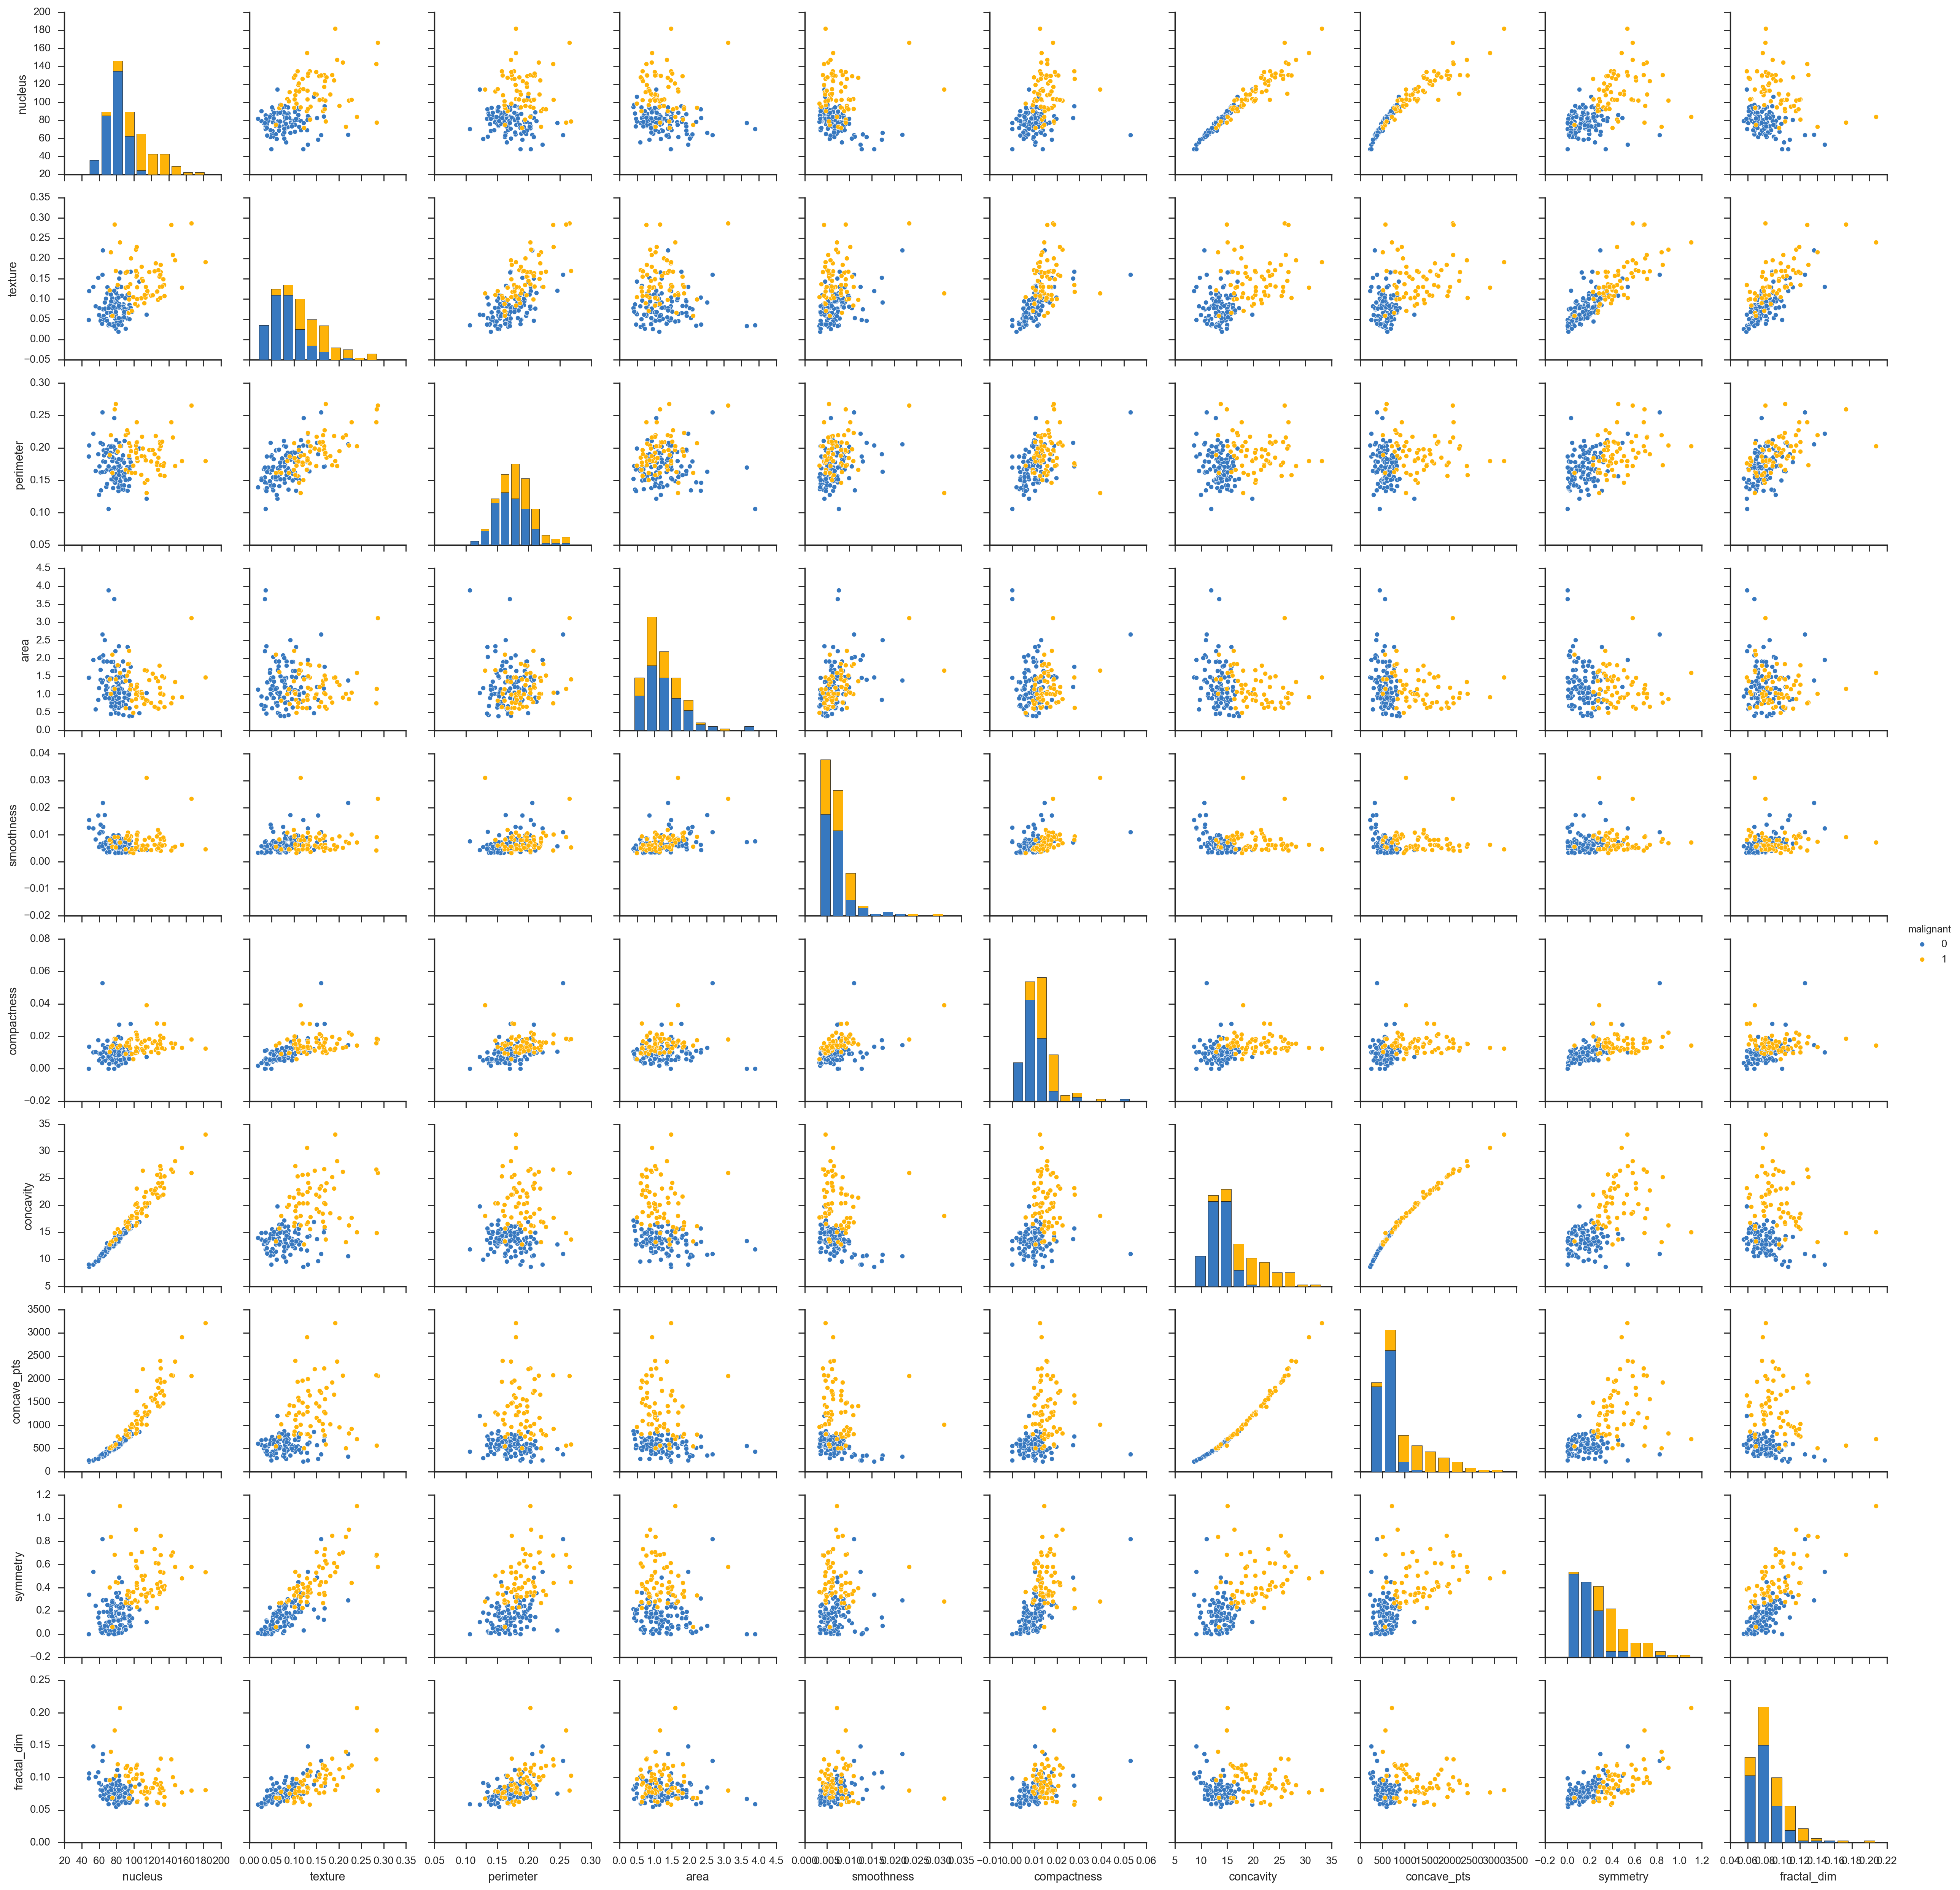

In [28]:
bcw_pairplotter(bcw_worst, colvars)

---

### 5. Test the performance of kNN classifiers on the data using cross-validation

Let's see how the kNN classifier performs on the dataset with cross-validation.

We are going to set some parameters in the classifier constructor. Some clarification below:

1. **n_neighbors** specifies how many neighbors will vote on the class
2. **weights** uniform weights indicate that all neighbors have the same weight
3. **metric** and **p**: when distance is minkowski (the default) and p == 2 (the default), _this is equivalent to the euclidean distance metric_

Load scikit's model_validation module and import `StratifiedKFold`

The `StratifiedKFold()` will return cross-validation _indices_ which you can use to subset your data in a for loop that runs the model and tests it. Get used to using indices for cross-validation on data – it's easy to get soft with `cross_val_score`, but being able do it at a more "manual" level allows for a lot more power and customization. It also reinforces what is happening in your head during cross-validation, since you have to divide up the data yourself with the indices!

The **stratified** version of cross-validation ensures that there are equal proportions the predicted class in each train-test fold. This is going to be a common practice in classification.

In [38]:
from sklearn.model_selection import StratifiedKFold

**Create X, y from the "mean" variables data:**

In [39]:
y = bcw_mean['malignant'].values
X = bcw_mean[colvars].values

**Create cross-validation train/test indices:**


In [42]:
cv_indices = StratifiedKFold(n_splits=5)

In [50]:
def accuracy_crossvalidator(X, Y, knn):
    '''Corss validates knn classifer with a StratifiedKFold
    Input: X - design matrix, array
           y - labels, array
           knn - classifer, object
    Output: accuracy scores, list
            mean accuracy, float'''
    
    # sudo code -> the code you write before you start writing code! (It helps us think through the actual code)
    # named your function accuracy_crossvalidator
    # your function accepts 3 parameters: X, y, knn (the model)
    # create StratifiedKFold object 
    acc_list = []
    cv_indices = StratifiedKFold(n_splits=5)
    for train_index, test_index in cv_indices.split(X, Y):
        
        X_train = X[train_index]
        X_test = X[test_index]
        Y_train = Y[train_index]
        Y_test = Y[test_index]
        
        knn.fit(X_train, Y_train)
        acc = knn.score(X_test, Y_test)
        acc_list.append(acc)
        
    
    # iterate through through the folds
    # train, test, and score your classifier
    
    # save the accuracy score from each iteration to a list called scores
    
    # return scores and mean scores
    return acc_list, np.mean(acc_list)


---

### 5.2: Cross-validate accuracy for a kNN model with 5 neighbors on the mean data subset

In [52]:
mean_knn_n5 = KNeighborsClassifier(n_neighbors=5,
                                   weights='uniform')

accs, mean_acc = accuracy_crossvalidator(X, y, mean_knn_n5)
accs, mean_acc

([0.86086956521739133,
  0.86956521739130432,
  0.89380530973451322,
  0.94690265486725667,
  0.90265486725663713],
 0.89475952289342042)

---

### 5.3: Cross-validate accuracy for a kNN model with 1 neighbor on the mean data subset

As you can see the mean cross-validated accuracy is very high with 5 neighbors. 

Let's see what it's like when we use only 1 neighbor:

In [53]:
mean_knn_n2 = KNeighborsClassifier(n_neighbors=1,
                              weights='uniform')

accs, mean_acc = accuracy_crossvalidator(X, y, mean_knn_n2)
accs, mean_acc

([0.86086956521739133,
  0.86086956521739133,
  0.88495575221238942,
  0.87610619469026552,
  0.90265486725663713],
 0.8770911889188151)

---

### 5.4 Cross-validate accuracy for a kNN model with 5 neighbors on the standard error subset

In [54]:
y = bcw_se['malignant'].values
X = bcw_se[colvars].values

se_knn_n2 = KNeighborsClassifier(n_neighbors=5,
                                 weights='uniform')

accs, mean_acc = accuracy_crossvalidator(X, y, se_knn_n2)
accs, mean_acc

([0.86956521739130432,
  0.93043478260869561,
  0.92035398230088494,
  0.91150442477876104,
  0.94690265486725667],
 0.91575221238938054)

---

### 5.5 Cross-validate accuracy for a kNN model with 5 neighbors on the worst value subset

In [67]:
y = bcw_worst['malignant'].values
X = bcw_worst[colvars].values

worst_knn_n5 = KNeighborsClassifier(n_neighbors=5,
                                    weights='uniform')

accs, mean_acc = accuracy_crossvalidator(X, y, worst_knn_n5)
accs, mean_acc

([0.87826086956521743,
  0.88695652173913042,
  0.90265486725663713,
  0.89380530973451322,
  0.89380530973451322],
 0.89109657560600231)

#### 5.6 Create a function that scores KNN for a range of K values

In [61]:
def get_accuracy_for_multiple_k(X, y, k_range): 
    '''Function trains,tests, and scores knn for a range of k values.
    
    Input: X - design matrix, nxm array
           y - labels, nx1 array
           k_range - range of k values, list
           
    Output: list of mean accuray for each k '''
    
    # iterate through the range of k values, use k values 1 through 30
    # initialize your KNN model with k neighbors
    # use accuracy_crossvalidator to get the mean accuracy
    # return a list called accuracy_list that contains the mean accuracies for each k 
    
    # Don't over think this: I was able to write this function using 6 lines of code
 
    accuracy_list = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
        _, mean_acc = accuracy_crossvalidator(X, y, knn)
        accuracy_list.append(mean_acc)  
    return accuracy_list

In [73]:
y = bcw_mean['malignant'].values
X = bcw_mean[colvars].values
accuracy_list = get_accuracy_for_multiple_k(X, y, range(1,30))

#### Plot an Accuracy vs. K Curve

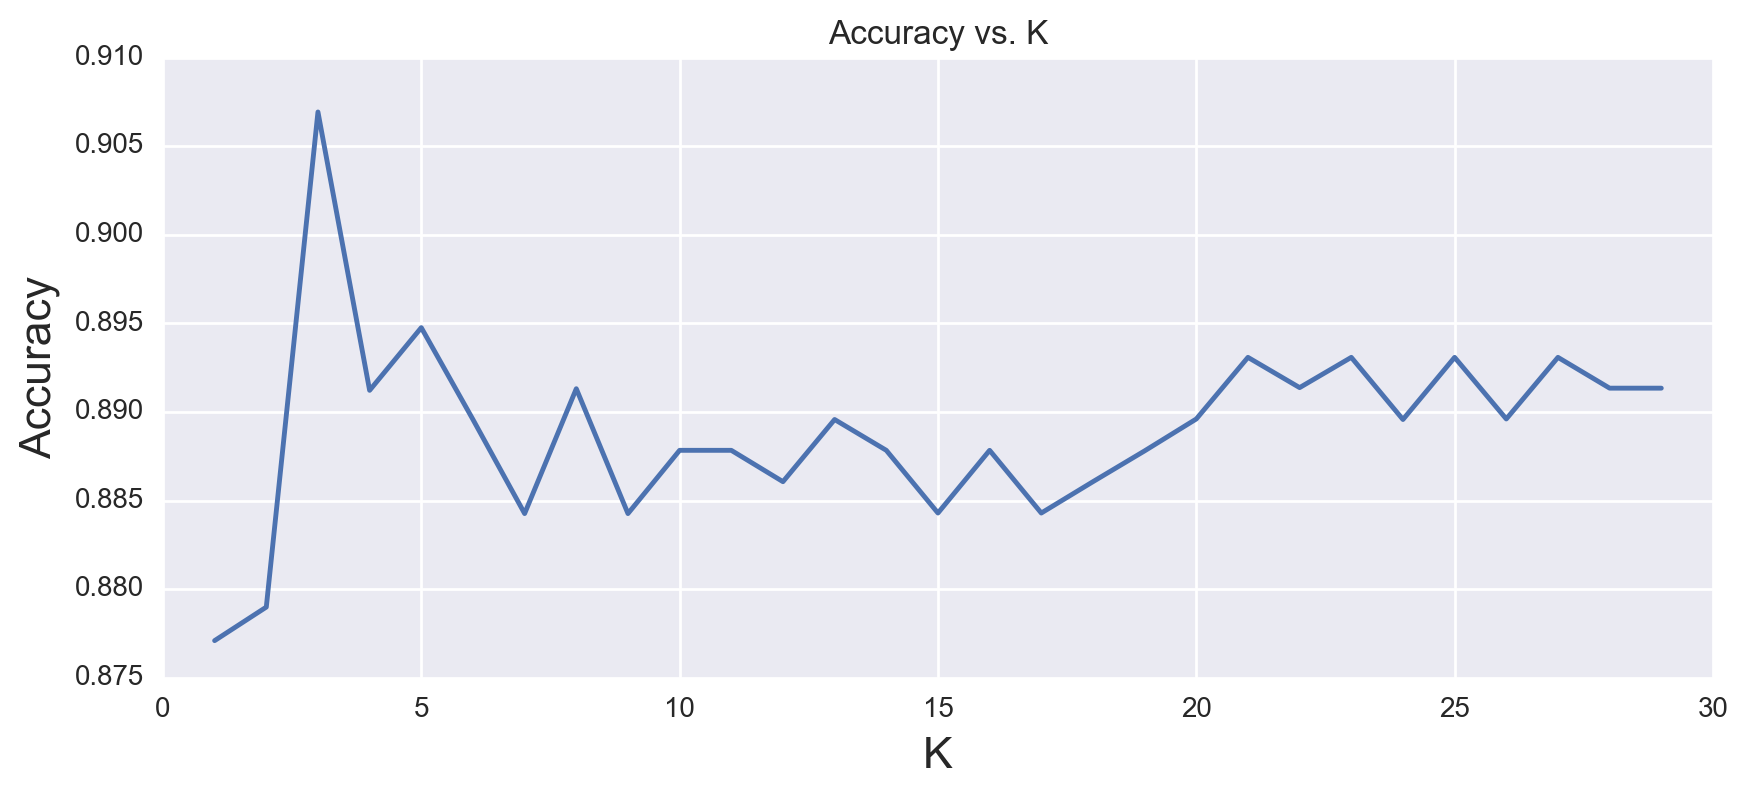

In [74]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
plt.title("Accuracy vs. K")
plt.plot(range(1,30), accuracy_list)
plt.xlabel('K', fontsize=16)
plt.ylabel('Accuracy', fontsize=16);

In [64]:
y = bcw_se['malignant'].values
X = bcw_se[colvars].values
accuracy_list = get_accuracy_for_multiple_k(X, y, range(1,30))

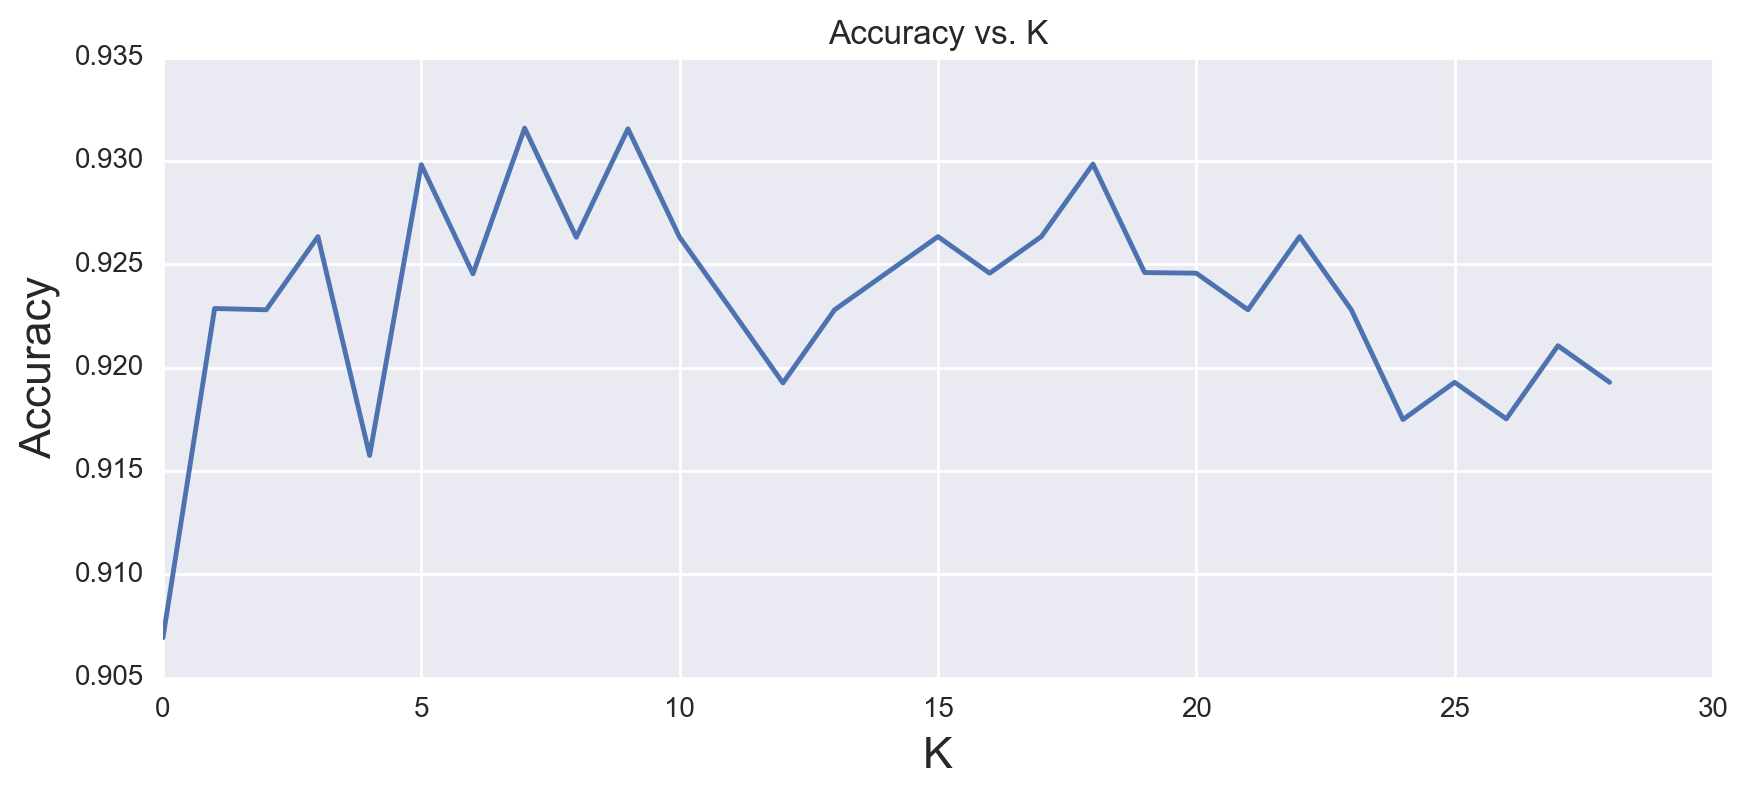

In [65]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
plt.title("Accuracy vs. K")
plt.plot(accuracy_list)
plt.xlabel('K', fontsize=16)
plt.ylabel('Accuracy', fontsize=16);

In [68]:
y = bcw_worst['malignant'].values
X = bcw_worst[colvars].values
accuracy_list = get_accuracy_for_multiple_k(X, y, range(1,30))

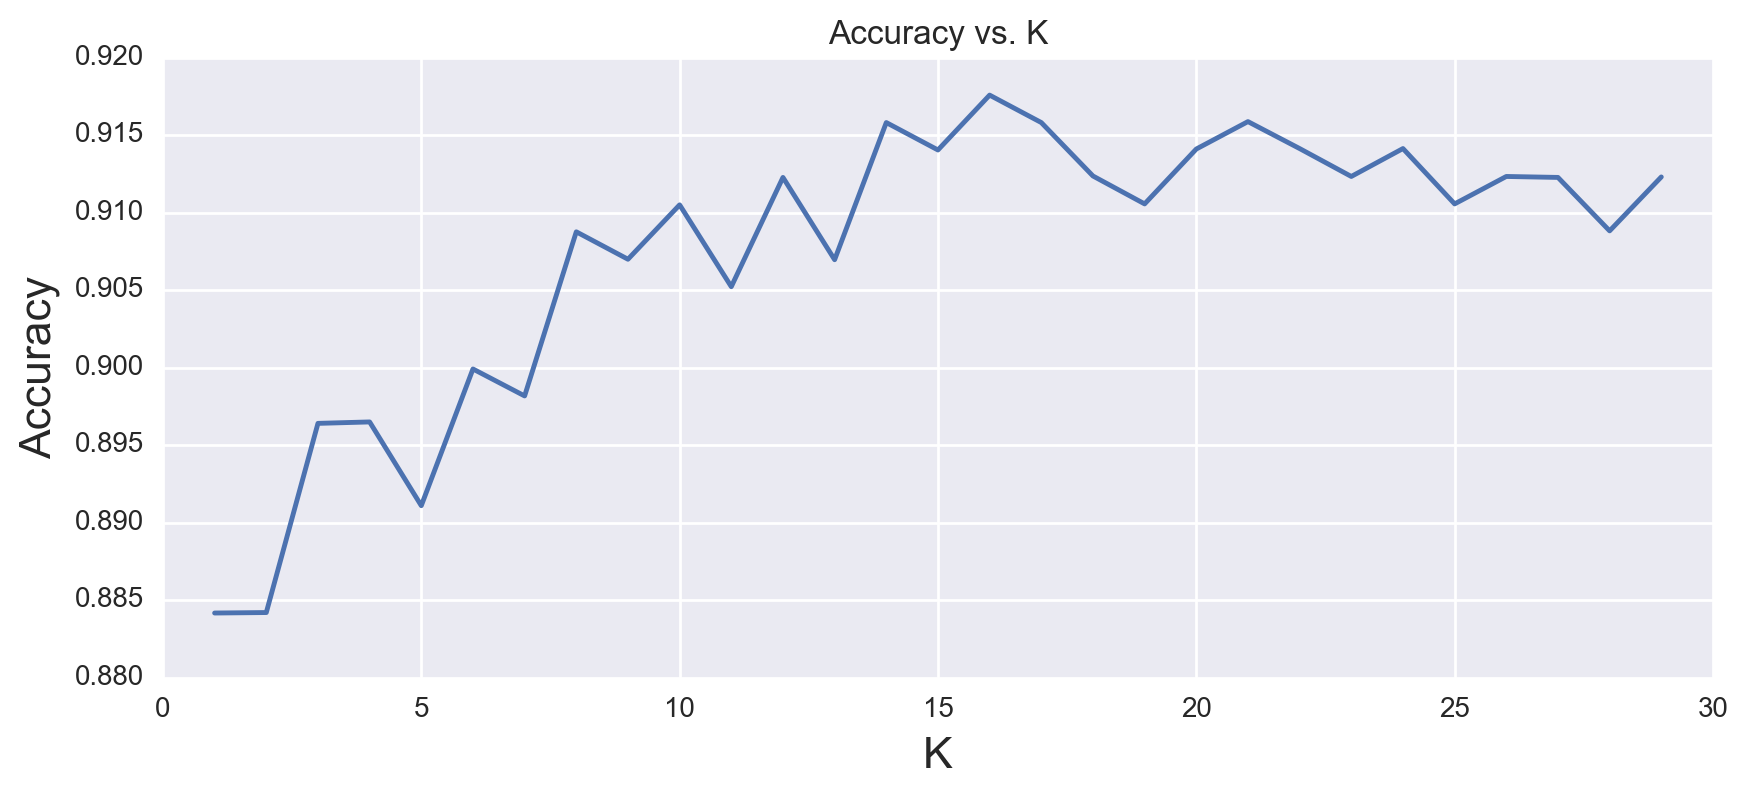

In [70]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
plt.title("Accuracy vs. K")
plt.plot(range(1,30), accuracy_list)
plt.xlabel('K', fontsize=16)
plt.ylabel('Accuracy', fontsize=16);

#### Questions: 

1. What is the optimum k value? Explain. 
2. Explain why the curve has raising and falling accuracy. Think back to how KNN actually works and think back to the pairplots to help you form an answer. 

In [ ]:
# change this cell to markdown and write your answer here

In most situations, we see that at some point, the number of k's stops increasing accuracy. The resulting plot is often called Elbow Accuracy. Here's a general plot thats often seen in the wild.
![Alt text](http://blog.yhat.com/static/img/knn_k_results.png "Elbow Accuracy")

---

### 6. Plot the kNN prediction boundary

Even with 1 neighbor we do quite well at predicting the malignant observations.

Below you can load an interactive KNN visualization class I wrote and put in your new `utils` directory.

The `KNNBoundaryPlotter` class has 4 required arguments:

    KNNBoundaryPlotter(data, predictor1, predictor2, class_target)
    
It will by default fit a visualization of the decision boundary across 1 to 100 nearest neighbors.

The boundary is where the classifier will vote for malignant vs. benign classes. 


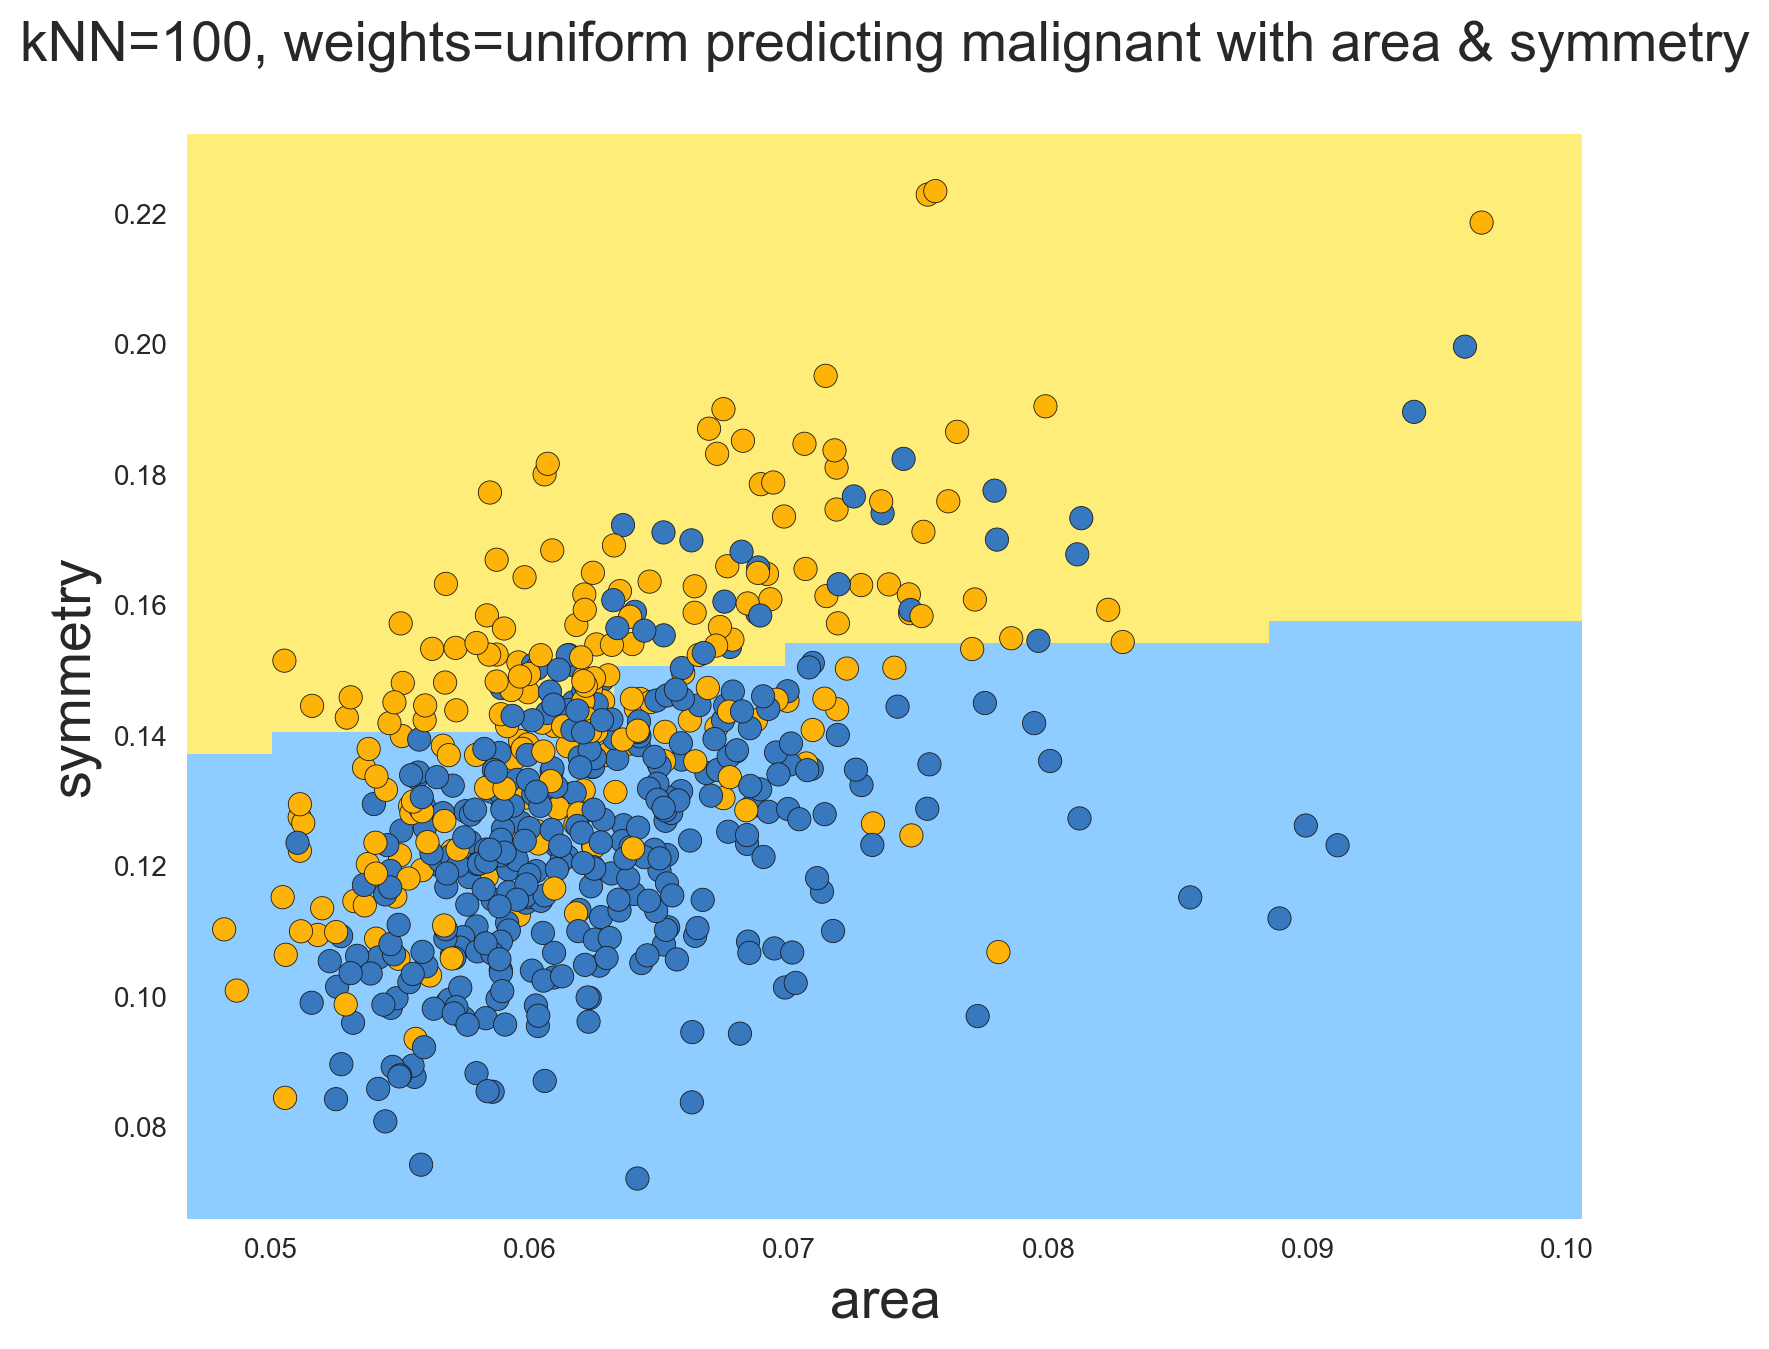

In [71]:
import imp
plotter = imp.load_source('plotter', '../../../utils/plotting/knn_plotter.py')
from plotter import KNNBoundaryPlotter

kbp = KNNBoundaryPlotter(bcw_mean, 'area', 'symmetry', 'malignant', nn_range=range(1,101))

kbp.knn_mesh_runner()

kbp.knn_interact()

---

### 7. What is the effect of increasing/decreasing the neighbors?

In [ ]:
#

---

### 8. What could be wrong with using accuracy as your measure of performance?

Image that you have a dataset with imbalanced labels. 

Imagine the label distribution was 1800 True and 200 False.

You have 2000 labels and 1800 of them are True. 

Think about what Precision and Recall tell you about your model's ability to classify both classes.

In [ ]:
#

Resource: http://scott.fortmann-roe.com/docs/BiasVariance.html